Logistic regression to classify handwritten digits. 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
data = sio.loadmat('./data/ex3data1.mat')

In [3]:
X = data['X']
X.shape

(5000, 400)

In [4]:
y = data['y']
n = len(y)
y = y.reshape(n)
y.shape

(5000,)

In [5]:
count_unique = np.unique(y, return_counts=True)
# data is balanced, 500 observastion of each classes

In [6]:
def show_image(x):
    digit = x.reshape(20,20, order='F')
    plt.imshow(digit, cmap='gray')
    plt.show()

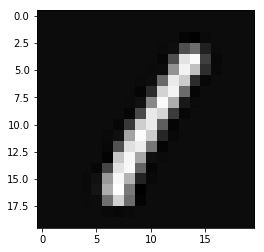

In [7]:
show_image(X[500])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

### Scikit learn

In [9]:
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial', max_iter=1000)

clf.fit(X_train, y_train)
X_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.892

true value:  4
predicted value:  8


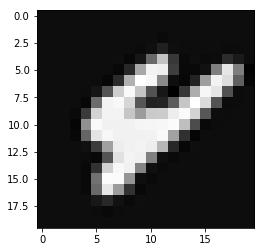

true value:  8
predicted value:  5


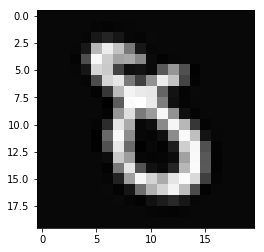

In [10]:
for i, x in enumerate(X_pred):
    if X_pred[i] != y_test[i]:
        print('true value: ', y_test[i])
        print('predicted value: ', X_pred[i])
        show_image(X_test[i])
    if i == 20:
        break


In [11]:
print('percentage of error: ', (y_test != X_pred).sum()/len(y_test))
print(classification_report(y_test, X_pred, labels=np.unique(y)))

percentage of error:  0.108
              precision    recall  f1-score   support

           1       0.96      0.98      0.97        45
           2       0.89      0.80      0.84        49
           3       0.83      0.81      0.82        54
           4       0.94      0.89      0.92        55
           5       0.84      0.88      0.86        56
           6       0.92      0.94      0.93        51
           7       0.91      0.93      0.92        42
           8       0.82      0.86      0.84        49
           9       0.88      0.90      0.89        49
          10       0.94      0.96      0.95        50

   micro avg       0.89      0.89      0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



### Dirty algorithm  
I have review it in week 3. However, in this case, finding a value for the learning rate was easier so I left it unchanged here.

In [12]:
def sigmoid(x):                                        
    return 1.0 / (1 + np.exp(-x))

def h(theta, X):
    return sigmoid(X.dot(theta))

def compute_cost(theta, X, y):
    m = len(y)
    return (1 / m) * (-y.T.dot(np.log(h(theta,X))) - (1 - y).T.dot(np.log(1 - h(theta,X))))

def gradient_descend(X, y, alpha=0.001, iters=1000, intercept=True, progress_track=False):
    if intercept:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    
    m, n = X.shape
    theta = np.zeros([n,1])
    y = y.reshape((m, 1))
        
    cost = np.zeros(iters)
        
    for i in range(iters): 
        Z = np.matmul(X, theta)
        A = sigmoid(Z)
        dz = A - y
        dw = 1/m * np.matmul(X.T, dz)
        theta = theta - alpha * dw
        cost[i] = compute_cost(theta, X, y)
        if i % 100 == 0 and progress_track:
            print(cost[i])        
    return theta, cost

In [13]:
# let's try find value of alpha
tmp_y = np.array(y == 1, dtype = int)
optTheta, cost = gradient_descend(X, tmp_y, alpha=0.1, iters=1000, progress_track=True)

0.4213388912749686
0.09461314873315876
0.0704220841418863
0.06033724051934903
0.05457497474784729
0.050761073471569024
0.048011291180174304
0.045914140020088035
0.04424961204067723
0.042888330442659515


In [14]:
# labels
k = len(np.unique(y))

# features
n = X_train.shape[1]

print(k, n)

all_theta = np.zeros((k, n+1))
i = 0
for number in np.unique(y):
    #set the labels in 0 and 1
    tmp_y = np.array(y_train == number, dtype = int)
    optTheta, cost = gradient_descend(X_train, tmp_y, alpha=0.01, iters=1000, progress_track=False)
    optTheta = np.reshape(optTheta,-1)
    all_theta[i] = optTheta
    i += 1

10 400


In [15]:
intercept = np.ones((X_test.shape[0], 1))
features = np.hstack((intercept, X_test))
P = sigmoid(features.dot(all_theta.T)) #probability for each nymber
p = [np.unique(y)[np.argmax(P[i, :])] for i in range(features.shape[0])]

In [16]:
print('percentaqge of error: ', (y_test != p).sum()/len(y_test))
print(classification_report(y_test, p, labels=np.unique(y)))

percentaqge of error:  0.18
              precision    recall  f1-score   support

           1       0.83      0.98      0.90        45
           2       0.79      0.76      0.77        49
           3       0.71      0.83      0.77        54
           4       0.92      0.82      0.87        55
           5       0.89      0.59      0.71        56
           6       0.87      0.90      0.88        51
           7       0.90      0.90      0.90        42
           8       0.76      0.80      0.78        49
           9       0.77      0.73      0.75        49
          10       0.81      0.94      0.87        50

   micro avg       0.82      0.82      0.82       500
   macro avg       0.83      0.83      0.82       500
weighted avg       0.83      0.82      0.82       500

